<a href="https://colab.research.google.com/github/ky106031/class-supervised-learning/blob/main/%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B7%B4%E7%BF%92%EF%BC%91_%E6%BB%8B%E8%B3%80%E5%A4%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/滋賀大/授業/教師あり学習/第1~3回：松村/MLdata/MonthlyAveragePrices_veg.csv')
df.head()

,Unnamed: 0,green_soybeans,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,green_peppers,apples,apples.1,mandarin_oranges
0,jan_beg,NaN,2643,622,982,861,756,1032,NaN,496.0,700.0
1,jan_mid,NaN,2297,556,824,825,665,1011,NaN,496.0,684.0
2,jan_end,NaN,2208,548,747,873,642,1238,NaN,487.0,708.0
3,jan_ave,NaN,2383,575,851,853,688,1094,NaN,493.0,697.0
4,feb_beg,NaN,2187,522,661,886,651,1204,NaN,491.0,764.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#[0,2,3,4,5,6,9]のcoloumnsのみのdfを作る

df = pd.read_csv('/content/drive/MyDrive/滋賀大/授業/教師あり学習/第1~3回：松村/MLdata/MonthlyAveragePrices_veg.csv', usecols=[0,2,3,4,5,6,9], index_col=0)
df.head()

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apples.1
jan_beg,2643,622,982,861,756,496.0
jan_mid,2297,556,824,825,665,496.0
jan_end,2208,548,747,873,642,487.0
jan_ave,2383,575,851,853,688,493.0
feb_beg,2187,522,661,886,651,491.0


In [ ]:
#columns の apple.1 を apple にする
df.rename(columns={"apples.1":"apple"}, inplace=True)
df.head()

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_beg,2643,622,982,861,756,496.0
jan_mid,2297,556,824,825,665,496.0
jan_end,2208,548,747,873,642,487.0
jan_ave,2383,575,851,853,688,493.0
feb_beg,2187,522,661,886,651,491.0


In [ ]:
#~aveという名前の index のみを利用したdf_avを作る
# .* : 任意の文字列を意味する正規表現
av_df = df[df.index.str.contains('.*ave')]
av_df

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,NaN
sep_ave,2673,508,635,665,801,NaN
oct_ave,2553,473,545,719,883,NaN


In [ ]:
#欠損値の場所を把握する
av_df.isnull()

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,False,False,False,False,False,False
feb_ave,False,False,False,False,False,False
mar_ave,False,False,False,False,False,False
apr_ave,False,False,False,False,False,False
may_ave,False,False,False,False,False,False
jun_ave,False,False,False,False,False,False
jul_ave,False,False,False,False,False,False
aug_ave,False,False,False,False,False,True
sep_ave,False,False,False,False,False,True
oct_ave,False,False,False,False,False,True


In [ ]:
#各columnsの欠損の数を求める
av_df.isnull().sum()

,0
kidney_beans,0
pumpkins,0
cucumbers,0
eggplants,0
tomatoes,0
apple,3


In [ ]:
#全て欠損値となっている列を削除する
av_full = av_df.dropna(axis=1, how="all")
av_full

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,NaN
sep_ave,2673,508,635,665,801,NaN
oct_ave,2553,473,545,719,883,NaN


In [ ]:
#欠損値の数が合計3個以上となっている列を削除する
av_th = av_df.dropna(thresh=3, axis=1)
av_th

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,NaN
sep_ave,2673,508,635,665,801,NaN
oct_ave,2553,473,545,719,883,NaN


In [ ]:
#欠損値を０で埋める
av_fill = av_df.fillna(0)
av_fill

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,0.0
sep_ave,2673,508,635,665,801,0.0
oct_ave,2553,473,545,719,883,0.0


In [ ]:
#欠損値（NaN）を、対応する列の平均値で埋める
av_fill = av_df.fillna(av_df.mean())
av_fill

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,537.0
sep_ave,2673,508,635,665,801,537.0
oct_ave,2553,473,545,719,883,537.0


In [ ]:
#欠損値（NaN）を「後ろの行の値（次の値）」で埋める
av_fill = av_df.fillna(method="bfill")
av_fill

/tmp/ipython-input-16-4134978736.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  av_fill = av_df.fillna(method="bfill")


,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,513.0
sep_ave,2673,508,635,665,801,513.0
oct_ave,2553,473,545,719,883,513.0


In [ ]:
#欠損値（NaN）を前後の値をもとに「線形補間（interpolation）」で埋める
av_fill = av_df.interpolate()
av_fill

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.0
feb_ave,2105,521,633,890,656,469.0
mar_ave,1974,519,568,773,689,470.0
apr_ave,2012,497,480,674,709,480.0
may_ave,2243,487,430,629,605,566.0
jun_ave,2185,488,470,664,610,648.0
jul_ave,2173,530,570,698,612,683.0
aug_ave,2032,531,510,665,608,640.5
sep_ave,2673,508,635,665,801,598.0
oct_ave,2553,473,545,719,883,555.5


In [ ]:
#av_dfの中で各列の最大値にハイライト（色付け）をする
av_df.style.highlight_max()

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
jan_ave,2383,575,851,853,688,493.000000
feb_ave,2105,521,633,890,656,469.000000
mar_ave,1974,519,568,773,689,470.000000
apr_ave,2012,497,480,674,709,480.000000
may_ave,2243,487,430,629,605,566.000000
jun_ave,2185,488,470,664,610,648.000000
jul_ave,2173,530,570,698,612,683.000000
aug_ave,2032,531,510,665,608,nan
sep_ave,2673,508,635,665,801,nan
oct_ave,2553,473,545,719,883,nan


In [ ]:
#av_df.style.highlight_max(color='red').highlight_min(color='blue')
#av_df.style.highlight_max(props='color: red').highlight_min(props='color: blue')
#av_df.style.highlight_null(color='black')

#可視化

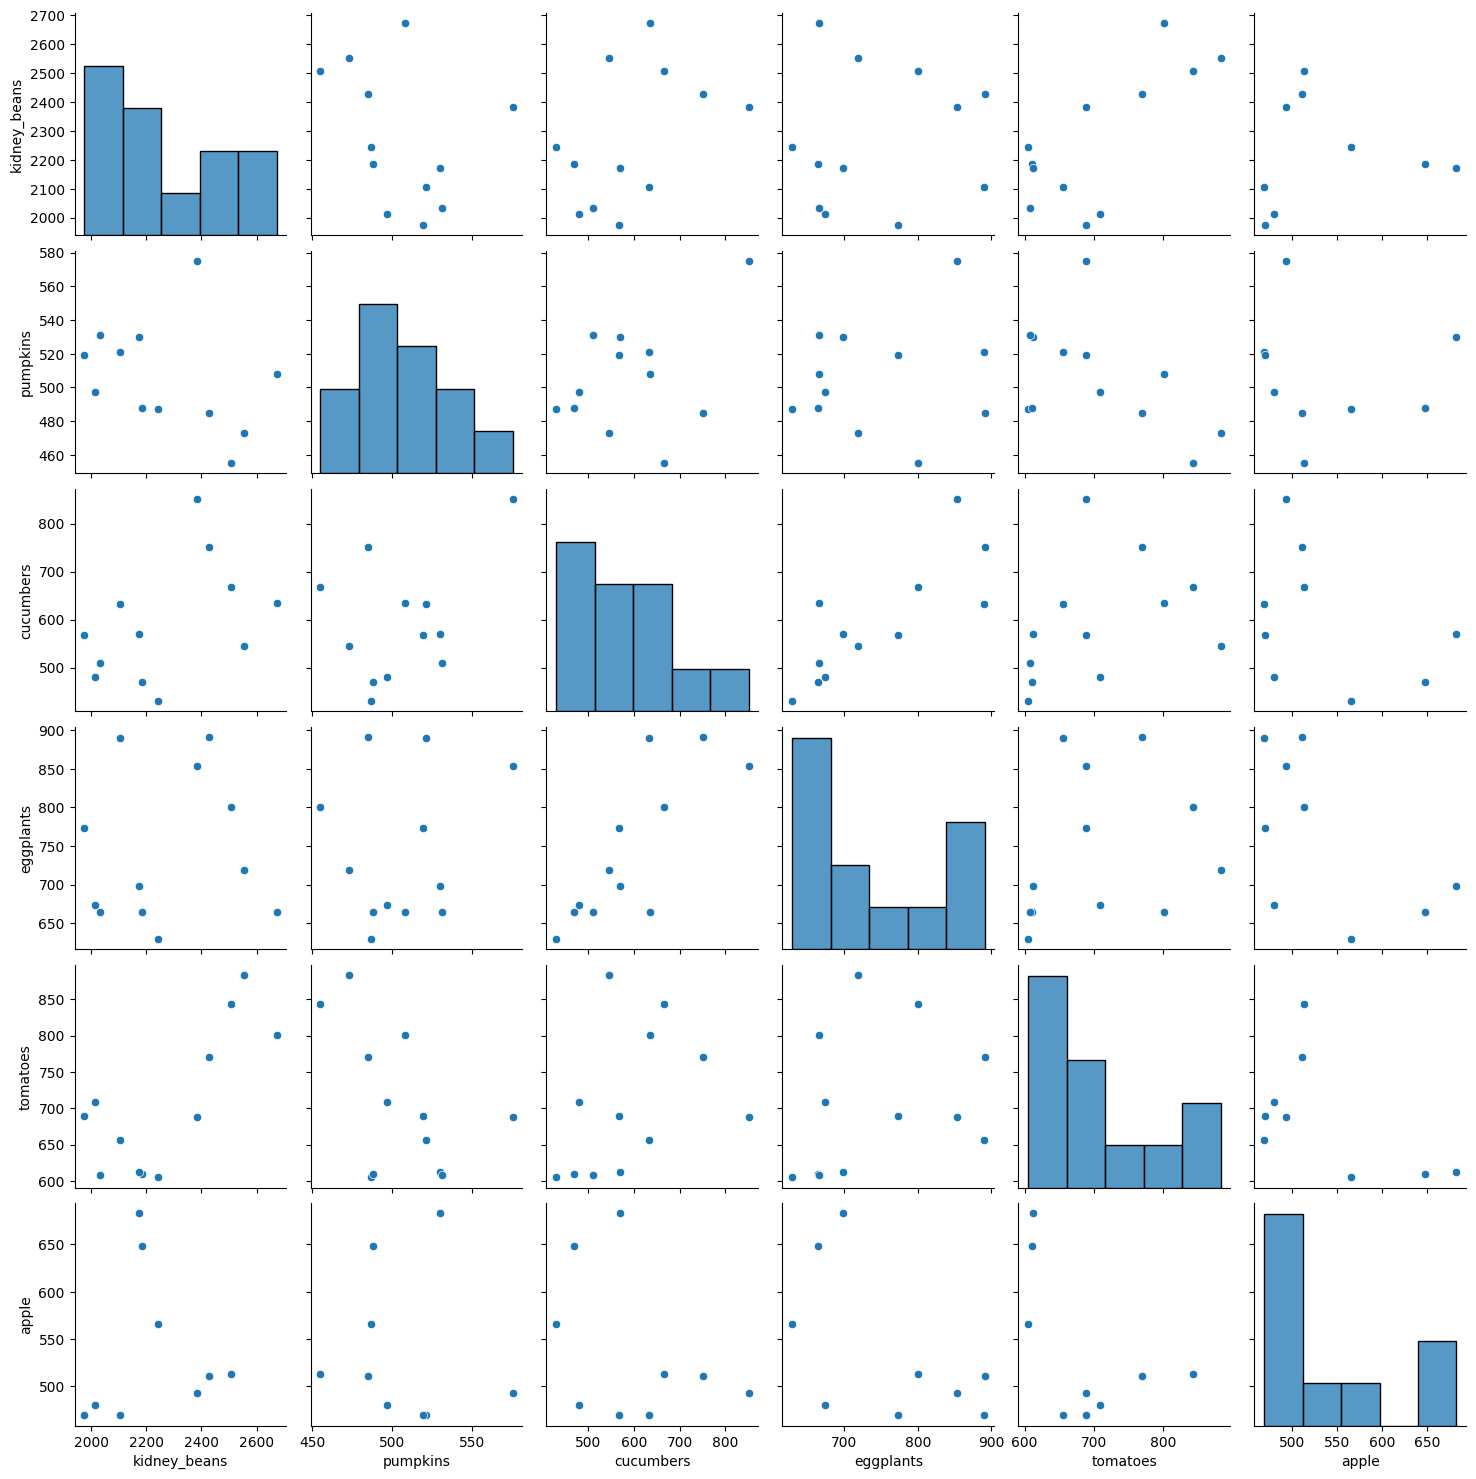

In [ ]:
#「ペアプロット（pair plot）」を作成
sns.pairplot(av_df)

In [ ]:
av_fill['season'] = ['Autumn/Winter','Autumn/Winter','Spring/Summer','Spring/Summer','Spring/Summer','Spring/Summer',
                     'Spring/Summer','Spring/Summer','Autumn/Winter','Autumn/Winter','Autumn/Winter','Autumn/Winter']
av_fill

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple,season
jan_ave,2383,575,851,853,688,493.0,Autumn/Winter
feb_ave,2105,521,633,890,656,469.0,Autumn/Winter
mar_ave,1974,519,568,773,689,470.0,Spring/Summer
apr_ave,2012,497,480,674,709,480.0,Spring/Summer
may_ave,2243,487,430,629,605,566.0,Spring/Summer
jun_ave,2185,488,470,664,610,648.0,Spring/Summer
jul_ave,2173,530,570,698,612,683.0,Spring/Summer
aug_ave,2032,531,510,665,608,640.5,Spring/Summer
sep_ave,2673,508,635,665,801,598.0,Autumn/Winter
oct_ave,2553,473,545,719,883,555.5,Autumn/Winter


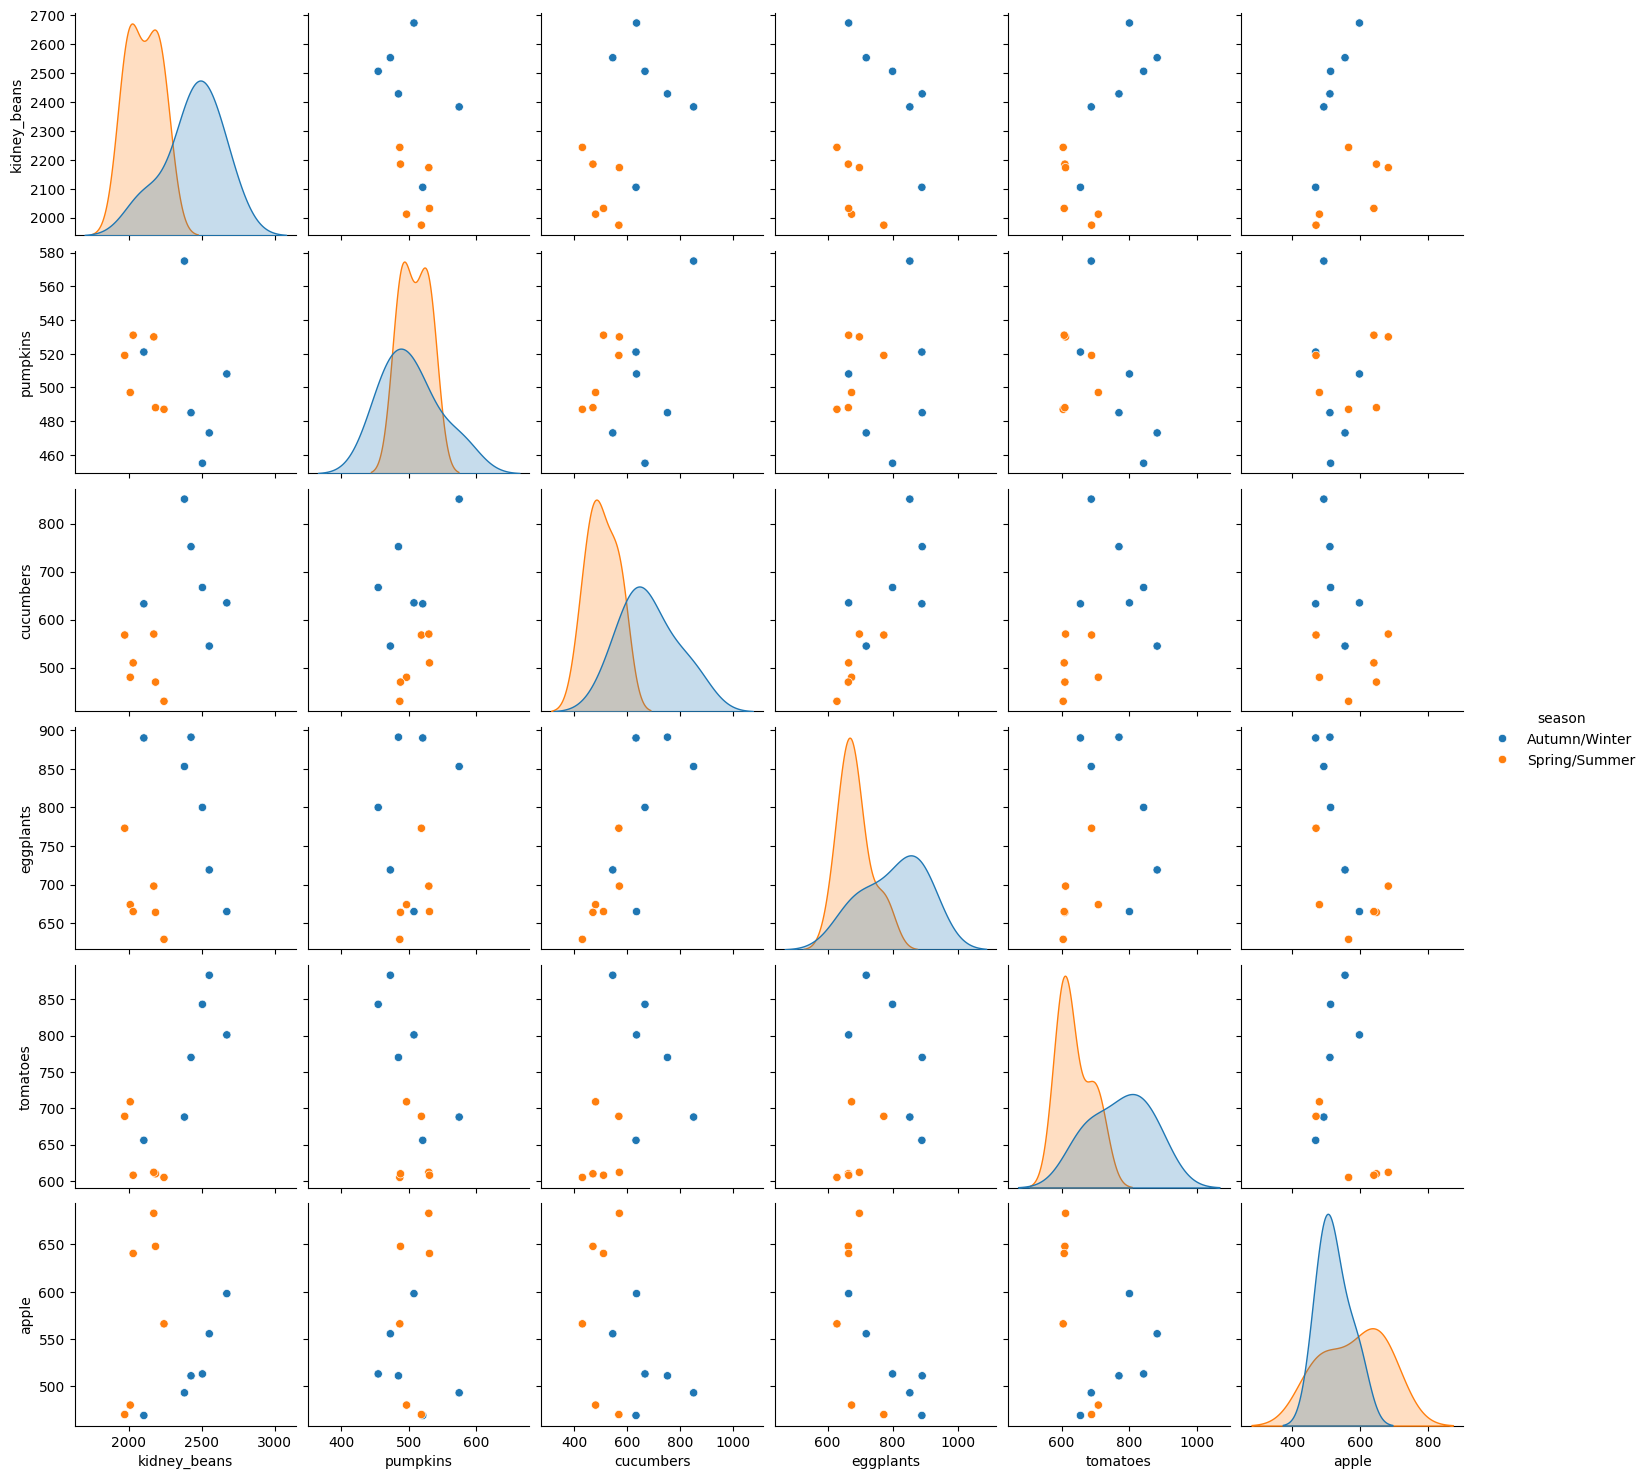

In [ ]:
#数値データのペアプロットを作成し、season列の値に応じて色分けをする
sns.pairplot(av_fill, hue='season')

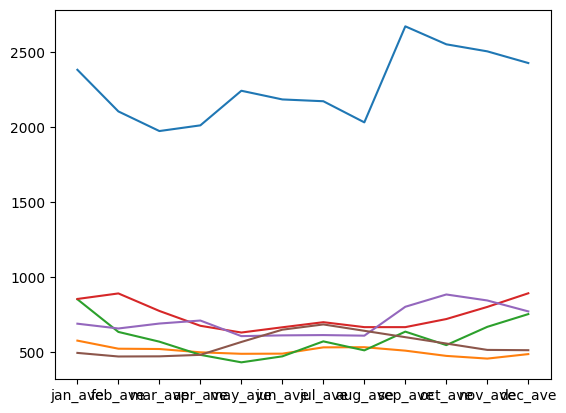

In [ ]:
# DataFrame からseasonの列を削除する
av_fill = av_fill.drop('season',axis=1)

# av_fill のデータをプロット（折れ線グラフとして描画）する
plt.plot(av_fill)

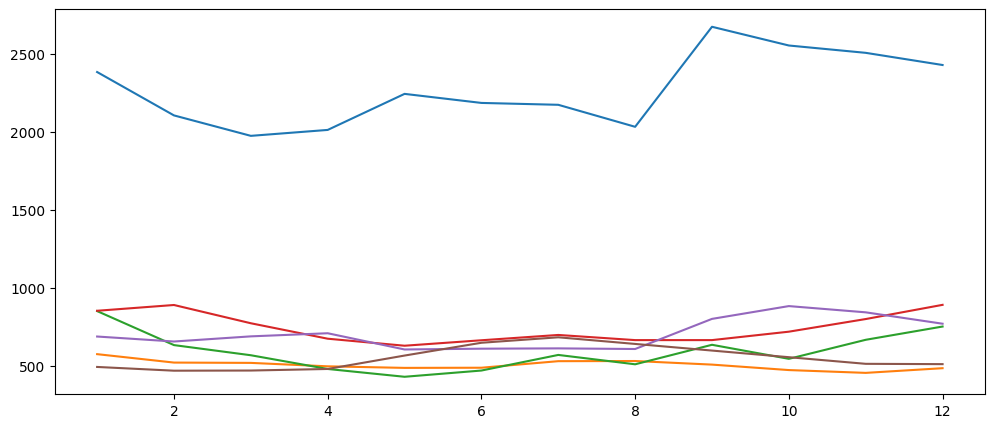

In [ ]:
# av_fill の インデックス（行番号） を 1 から 12 までの連番に変更
av_fill.index = np.arange(1,13)

# サイズを横12インチ × 縦5インチの描画領域（Figure）と描画軸（Axes）を生成
fig,ax= plt.subplots(figsize=(12,5))

#av_fill の内容を折れ線グラフで描画
ax.plot(av_fill)
plt.show()

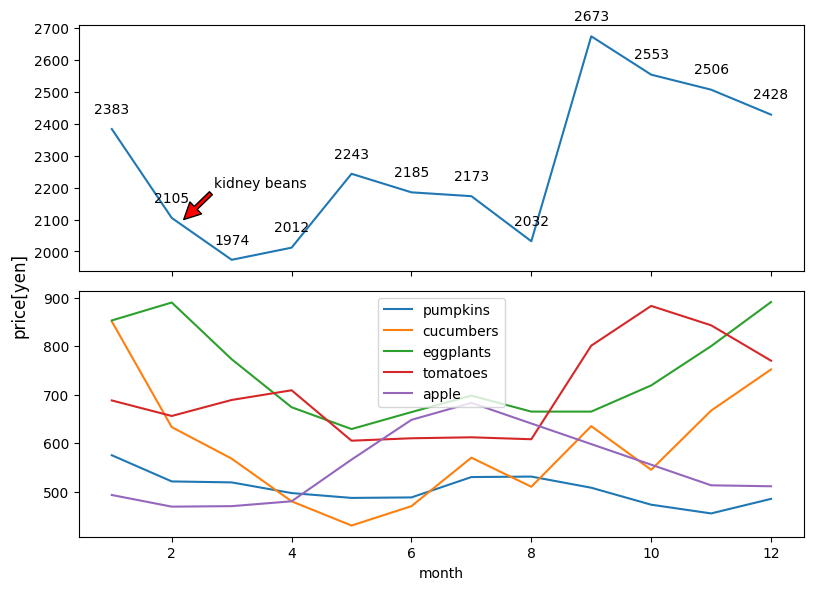

In [ ]:
#2行1列（縦2段）、横8・縦6インチ、X軸（月）は上下のグラフで共通の描画領域を生成
fig,ax = plt.subplots(2,1, figsize=(8,6), sharex=True)

#上段グラフに「kidney_beans」の折れ線グラフを表示
ax[0].plot(av_fill['kidney_beans'])

# 下段グラフに、kidney_beans 以外の全品目を表示、各線の凡例（品目名）を設定
ax[1].plot(av_fill.iloc[:,1:], label=av_fill.columns[1:])

# 下段グラフに「X軸のラベル（月）」を付与
ax[1].set_xlabel('month')

# 上段グラフに注釈を追加
# 'kidney beans' というテキストを (2.2, 2100) に指して
# (2.7, 2200) の位置にテキスト表示（少し上にずらして表示）
# xy() : 矢印の先端（注目点の座標）
# xytext() : テキストを配置する位置
# 矢印の太さ:3・色:redを設定
ax[0].annotate('kidney beans', xy=(2.2, 2100), xytext=(2.7, 2200),
               arrowprops=dict(width=3, facecolor='red', edgecolor='black'))

# kidney_beans の全データ点について、各点の上にその数値を +50 だけ上にずらして表示
# ha='center'：テキストを水平方向に中央揃え
for x,y in zip(av_fill.index,av_fill['kidney_beans']):
  ax[0].text(x, y+50, str(y), ha='center')

# 下段グラフに凡例（品目名）を表示
ax[1].legend()

# グラフ要素同士の間隔を自動調整して詰めすぎを回避
fig.tight_layout()

# 全体の左側に共通のY軸ラベル「price[yen]」を追加
# x=0 で左端に配置、ha='center' で垂直方向に中央揃え
# ラベルのX座標（横位置）。0で図の左端に表示される（1なら右端）
fig.supylabel('price[yen]', x=0, ha='center')
plt.show()

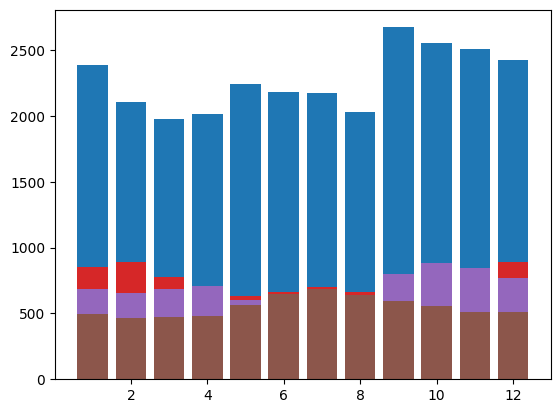

In [ ]:
# av_fillの各列に対して、それぞれの値を月ごと（インデックス）に棒グラフとして順に重ねて描画
for i in range(len(av_fill.columns)):
  plt.bar(av_fill.index,av_fill.iloc[:,i])

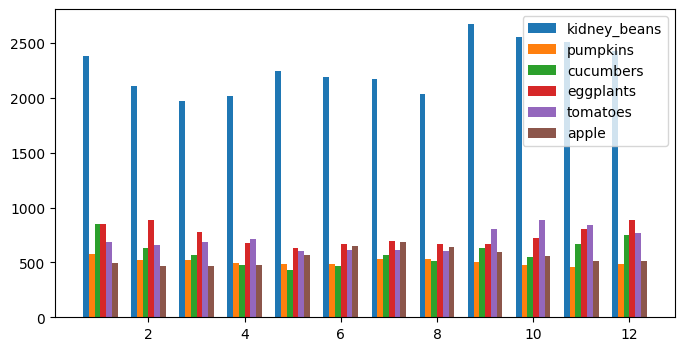

In [ ]:
# 棒の幅を指定
width = 0.12

# 最初の棒の位置を左にずらす（中央からの開始位置調整）
start = -0.3

# 描画領域（Figure）と描画軸（Axes） を生成(8,4)
fig,ax = plt.subplots(figsize=(8,4))

# 各列（品目）に対してループを実行
# 各月（X軸の位置）に対して、品目ごとに棒を横にずらして表示
for i in range(len(av_fill.columns)):
  ax.bar(av_fill.index+start+width*i, av_fill.iloc[:,i], width=width, label=av_fill.columns[i])

# 棒に対応する品目名を凡例用に設定
ax.legend()

In [ ]:
# av_fill に含まれる各列どうしの相関関係
corr = av_fill.corr()
corr

,kidney_beans,pumpkins,cucumbers,eggplants,tomatoes,apple
kidney_beans,1.000000,-0.322612,0.453582,0.117738,0.743790,0.059575
pumpkins,-0.322612,1.000000,0.378391,0.179755,-0.504580,0.017250
cucumbers,0.453582,0.378391,1.000000,0.804600,0.364138,-0.399228
eggplants,0.117738,0.179755,0.804600,1.000000,0.262006,-0.641267
tomatoes,0.743790,-0.504580,0.364138,0.262006,1.000000,-0.350878
apple,0.059575,0.017250,-0.399228,-0.641267,-0.350878,1.000000


<Axes: >

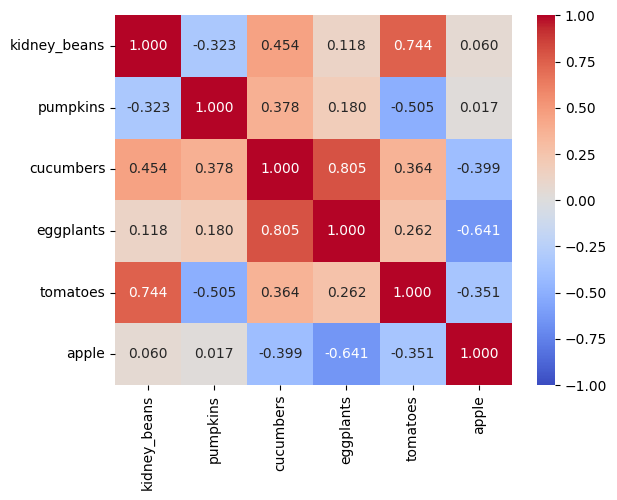

In [ ]:
# ヒートマップを表示
# vmin : 色のスケールの最小値を -1 に固定
# vmax : 色のスケールの最大値を +1 に固定
# annot = True : 各セル内に数値を表示
# fmt = '.3f : 数値の表示形式。小数点以下3桁で表示
# cmap : カラーマップの指定
# plt.colormaps()で一覧が見られる

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='coolwarm')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/滋賀大/授業/教師あり学習/第1~3回：松村/MLdata/04-03-01.xls')
df.head()

,学校,学年,性別,握力(右)(kg),握力(左)(kg),上体起し(回),長座体前屈(cm),反復横とび(点),20mｼｬﾄﾙﾗﾝ(回),50m走(秒),立ち幅とび(cm),ソフトボール投げ(m)
0,小学校,小1,男,9.0,7.0,13,17,31,10,11.2,95,5
1,小学校,小1,男,9.0,7.0,18,30,33,44,10.1,142,23
2,小学校,小1,男,6.0,5.0,10,16,19,10,13.9,85,1
3,小学校,小1,男,10.0,8.0,13,27,30,10,11.0,92,5
4,小学校,小1,男,9.0,8.0,8,15,27,10,12.9,95,7


In [ ]:
# df['列名'].unique() : 列の中のユニークな値
# df.columns[df.columns.duplicated()] : 重複している列名を探す
# df[['列A','列B']].drop_duplicates() : 複数列でユニークな行
# for col in df.columns: print(col, df[col].unique()) : 全列のユニーク値を一覧

In [ ]:
# 学年，男女別で50m走の平均値を求める
df_run = df.groupby(['学年','性別'])['50m走(秒)'].agg('mean')
df_run

学年  性別
中1  女      9.225000
    男      8.458333
中2  女      8.725000
    男      7.875000
中3  女      8.600000
    男      7.841667
小1  女     11.338710
    男     10.725926
小2  女     10.990000
    男     10.582143
小3  女     11.157143
    男     10.246875
小4  女     10.106452
    男      9.595652
Name: 50m走(秒), dtype: float64

In [ ]:
# 「性別」を列方向に展開
df_run_us = df_run.unstack('性別')
df_run_us

性別,女,男
学年,,
中1,9.225000,8.458333
中2,8.725000,7.875000
中3,8.600000,7.841667
小1,11.338710,10.725926
小2,10.990000,10.582143
小3,11.157143,10.246875
小4,10.106452,9.595652


In [ ]:
# もともとのインデックスの 後半4つを先に、前半3つを後に並べ替える順番を作る
# np.append(..., ...) : 2つの配列を結合して1つにする関数
ind = np.append(np.arange(3,7),np.arange(0,3))

#インデックスの順番を [3,4,5,6,0,1,2] の順に並べたものを取得し、df_run_us の行（種目など）をこの順番に並び替える
df_run_ord = df_run_us.reindex(index=df_run_us.index[ind])
df_run_ord

性別,女,男
学年,,
小1,11.338710,10.725926
小2,10.990000,10.582143
小3,11.157143,10.246875
小4,10.106452,9.595652
中1,9.225000,8.458333
中2,8.725000,7.875000
中3,8.600000,7.841667


In [ ]:
# 50m走が9.5秒以下の人数の割合
# s.lt(thres) : s の各要素が thres より小さいかを判定し、True/False のブール配列を返す。
def pct_lt(s, thres):
  return s.lt(thres).mean()

df_run_lt = df.groupby(['学年','性別'])['50m走(秒)'].agg(pct_lt, 9.5)
df_run_lt

学年  性別
中1  女     0.833333
    男     1.000000
中2  女     0.833333
    男     1.000000
中3  女     1.000000
    男     1.000000
小1  女     0.032258
    男     0.000000
小2  女     0.000000
    男     0.000000
小3  女     0.107143
    男     0.187500
小4  女     0.161290
    男     0.565217
Name: 50m走(秒), dtype: float64

In [ ]:
# 性別で展開
df_run_lt_ord = df_run_lt.unstack('性別').reindex(index=df_run_us.index[ind])
df_run_lt_ord

性別,女,男
学年,,
小1,0.032258,0.000000
小2,0.000000,0.000000
小3,0.107143,0.187500
小4,0.161290,0.565217
中1,0.833333,1.000000
中2,0.833333,1.000000
中3,1.000000,1.000000


In [ ]:
x_f = np.arange(0,7)-0.2
x_m = np.arange(0,7)+0.2

In [ ]:
#plt.rcParams['font.family'] = 'MS Gothic'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from font(s) DejaVu Sans.
  fig.canvas

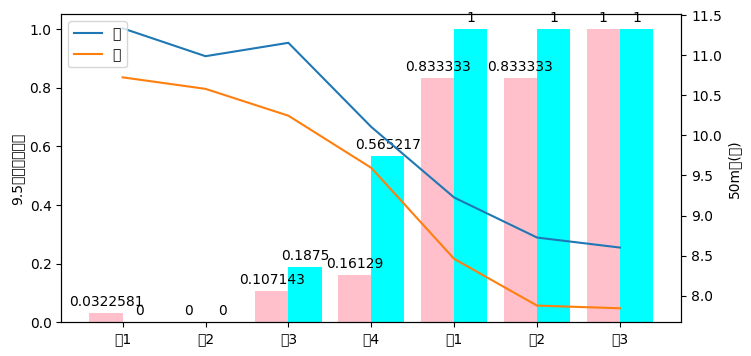

In [ ]:
# グラフの土台と描画領域（横8、縦4インチ）を作成
fig,ax = plt.subplots(figsize=(8,4))

# 男女の9.5秒以下の割合（df_run_lt_ord['女']）を棒グラフで描画
# 各棒の上に数値ラベルを表示
graph_f = ax.bar(x_f, df_run_lt_ord['女'], width=0.4, color='pink')
ax.bar_label(graph_f, padding=3)
graph_m = ax.bar(x_m, df_run_lt_ord['男'], width=0.4, color='cyan')
ax.bar_label(graph_m, padding=3)

# 左のY軸ラベル（割合）
ax.set_ylabel('9.5秒以下の割合')

# 同じX軸に異なるY軸スケールを持つ第2軸（右Y軸）を追加
ax2 = plt.twinx()

#  折れ線グラフを重ねる
ax2.plot(df_run_ord, label=df_run_ord.columns)
ax2.set_ylabel('50m走(秒)')

# 線のラベル（性別）を左上に表示
ax2.legend(loc='upper left')
plt.show()